# GDP Data Cleaning 

This notebook cleans the World Bank GDP data to only include GDP values for 2021, region, and IncomeGroup variables. Following cleaning, the data is merged with the Netflix data. 
Only the countries included in both datasets are kept in the final analytic dataset.

In [38]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns

In [3]:
os.chdir("/Users/lindseynorberg/github/DS-Netflix-Project")

In [5]:
path_to_gdp = "/Users/lindseynorberg/github/DS-Netflix-Project/gdp_data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3628616.csv"

In [6]:
path_to_metadata = "/Users/lindseynorberg/github/DS-Netflix-Project/gdp_data/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3628616.csv"

In [7]:
path_to_netflix = "/Users/lindseynorberg/github/DS-Netflix-Project/Netflix subscription fee Dec-2021.csv"

 ### Cleaning GDP Data 

In [8]:
df_gdp = pd.read_csv(path_to_gdp, skiprows = 3, header = 0 , dtype = str)

In [9]:
df_gdp2 = df_gdp[['Country Code','Country Name', '2020']].copy()

In [10]:
df_gdp2 = df_gdp2.rename(columns={'2020':'2020_GDP'})
df_gdp2['2020_GDP'] = df_gdp2['2020_GDP'].apply(lambda x: float(x) if isinstance(x, str) else x)

In [11]:
df_gdp2.head()

,Country Code,Country Name,2020_GDP
0,ABW,Aruba,NaN
1,AFE,Africa Eastern and Southern,9.207923e+11
2,AFG,Afghanistan,2.011614e+10
3,AFW,Africa Western and Central,7.845876e+11
4,AGO,Angola,5.837598e+10


### Cleaning Meta Data 

In [12]:
df_meta = pd.read_csv(path_to_metadata, header = 0 , dtype = str, usecols = [0,1,2])

In [13]:
df_meta.head()
len(df_meta)

265

### Merging data 

In [14]:
GDP_Final = pd.merge(df_gdp2, df_meta, on="Country Code", how="right") 

In [15]:
GDP_Final.head(30)

,Country Code,Country Name,2020_GDP,Region,IncomeGroup
0,ABW,Aruba,NaN,Latin America & Caribbean,High income
1,AFE,Africa Eastern and Southern,9.207923e+11,NaN,NaN
2,AFG,Afghanistan,2.011614e+10,South Asia,Low income
3,AFW,Africa Western and Central,7.845876e+11,NaN,NaN
4,AGO,Angola,5.837598e+10,Sub-Saharan Africa,Lower middle income
5,ALB,Albania,1.488763e+10,Europe & Central Asia,Upper middle income
6,AND,Andorra,NaN,Europe & Central Asia,High income
7,ARB,Arab World,2.447584e+12,NaN,NaN
8,ARE,United Arab Emirates,3.588688e+11,Middle East & North Africa,High income
9,ARG,Argentina,3.892881e+11,Latin America & Caribbean,Upper middle income


### Exporting GDP Data 

In [16]:
GDP_Final.to_csv('gdp_data/gdp_final.csv') 

### Merging with Netlflix data

In [17]:
netflix = pd.read_csv(path_to_netflix, header = 0)

In [18]:
netflix = netflix.rename(columns={'Country':'Country Name'})

In [19]:
#Change the names for a perfect match 
GDP_Final.replace({'Country Name':{'Czech Republic': 'Czechia', 'Hong Kong SAR, China': 'Hong Kong', 
                 'Russian Federation': 'Russia', 'Slovak Republic': 'Slovakia',
                 'Korea, Rep.': 'South Korea', 'Venezuela, RB': 'Venezuela'}}, value = None, inplace=True)
                            
GDP_Final.tail(50)               

,Country Code,Country Name,2020_GDP,Region,IncomeGroup
215,SSD,South Sudan,NaN,Sub-Saharan Africa,Low income
216,SSF,Sub-Saharan Africa,1.705380e+12,NaN,NaN
217,SST,Small states,4.514237e+11,NaN,NaN
218,STP,Sao Tome and Principe,4.729145e+08,Sub-Saharan Africa,Lower middle income
219,SUR,Suriname,2.884248e+09,Latin America & Caribbean,Upper middle income
220,SVK,Slovakia,1.051726e+11,Europe & Central Asia,High income
221,SVN,Slovenia,5.358961e+10,Europe & Central Asia,High income
222,SWE,Sweden,5.412201e+11,Europe & Central Asia,High income
223,SWZ,Eswatini,3.972729e+09,Sub-Saharan Africa,Lower middle income
224,SXM,Sint Maarten (Dutch part),NaN,Latin America & Caribbean,High income


In [21]:
netflix_gdp = pd.merge(netflix, GDP_Final, on = "Country Name", how = "left")

In [22]:
netflix_gdp2 = netflix_gdp.drop(columns = 'Country Code')

In [23]:
netflix_gdp2 = netflix_gdp2.rename(columns={'Country Name':'Country',
                                   'Total Library Size':'Total_Library_Size',
                                  'No. of TV Shows': 'TV_num',
                                  'No. of Movies': 'Movies_num',
                                  'Cost Per Month - Basic ($)': 'Basic_CPM',
                                  'Cost Per Month - Standard ($)': 'Standard_CPM',
                                  'Cost Per Month - Premium ($)': 'Premium_CPM'})


In [24]:
netflix_gdp2.head(20)

,Country_code,Country,Total_Library_Size,TV_num,Movies_num,Basic_CPM,Standard_CPM,Premium_CPM,2020_GDP,Region,IncomeGroup
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,3.892881e+11,Latin America & Caribbean,Upper middle income
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,1.327836e+12,East Asia & Pacific,High income
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,4.332585e+11,Europe & Central Asia,High income
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,5.218613e+11,Europe & Central Asia,High income
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,3.657276e+10,Latin America & Caribbean,Lower middle income
5,br,Brazil,4972,3162,1810,4.61,7.11,9.96,1.444733e+12,Latin America & Caribbean,Upper middle income
6,bg,Bulgaria,6797,4819,1978,9.03,11.29,13.54,6.988935e+10,Europe & Central Asia,Upper middle income
7,ca,Canada,6239,4311,1928,7.91,11.87,15.03,1.645423e+12,North America,High income
8,cl,Chile,4994,3156,1838,7.07,9.91,12.74,2.529400e+11,Latin America & Caribbean,High income
9,co,Colombia,4991,3156,1835,4.31,6.86,9.93,2.714376e+11,Latin America & Caribbean,Upper middle income


### Exporting Final Analystic Dataset

In [25]:
netflix_gdp2.to_csv('Netflix_GDP_Merged.csv') 

### Statistics Models


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
netflix_gdp2.dtypes

Country_code           object
Country                object
Total_Library_Size      int64
TV_num                  int64
Movies_num              int64
Basic_CPM             float64
Standard_CPM          float64
Premium_CPM           float64
2020_GDP              float64
Region                 object
IncomeGroup            object
dtype: object

In [28]:
results = smf.ols('Basic_CPM ~ TV_num + Region + Movies_num', data=netflix_gdp2).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Basic_CPM   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     3.762
Date:                Sun, 27 Mar 2022   Prob (F-statistic):            0.00141
Time:                        15:28:45   Log-Likelihood:                -118.93
No. Observations:                  64   AIC:                             255.9
Df Residuals:                      55   BIC:                             275.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [29]:
# model parameters
results.params

Intercept                               9.722833
Region[T.Europe & Central Asia]         0.522252
Region[T.Latin America & Caribbean]    -1.439039
Region[T.Middle East & North Africa]    2.272773
Region[T.North America]                 0.123594
Region[T.South Asia]                   -5.606338
Region[T.Sub-Saharan Africa]           -2.033082
TV_num                                 -0.000054
Movies_num                             -0.000600
dtype: float64

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'fitted')

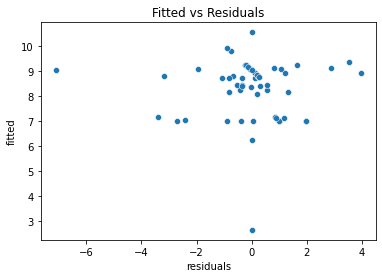

In [30]:
sns.scatterplot(results.resid, results.fittedvalues)
plt.title('Fitted vs Residuals')
plt.xlabel('residuals')
plt.ylabel('fitted')

### Summary Statistics

In [34]:
netflix_gdp2.head()

,Country_code,Country,Total_Library_Size,TV_num,Movies_num,Basic_CPM,Standard_CPM,Premium_CPM,2020_GDP,Region,IncomeGroup
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,3.892881e+11,Latin America & Caribbean,Upper middle income
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,1.327836e+12,East Asia & Pacific,High income
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,4.332585e+11,Europe & Central Asia,High income
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,5.218613e+11,Europe & Central Asia,High income
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,3.657276e+10,Latin America & Caribbean,Lower middle income


In [33]:
netflix_gdp2.groupby("IncomeGroup").mean()

,Total_Library_Size,TV_num,Movies_num,Basic_CPM,Standard_CPM,Premium_CPM,2020_GDP
IncomeGroup,,,,,,,
High income,5421.450000,3656.150000,1765.300000,9.188000,13.37625,17.641000,1.376833e+12
Lower middle income,5234.666667,3315.166667,1919.500000,6.661667,9.47500,11.960000,7.159821e+11
Upper middle income,5133.470588,3312.176471,1821.294118,6.984118,9.68000,12.316471,4.331402e+11


<AxesSubplot:xlabel='Standard_CPM', ylabel='IncomeGroup'>

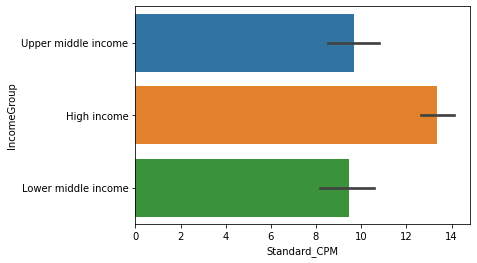

In [53]:
# Visual representing the summary table above - standard cost per month by country income group
sns.barplot(x = "Standard_CPM", y = "IncomeGroup", data = netflix_gdp2, orient = "h")

In [50]:
netflix_gdp2.groupby("Region").mean()

,Total_Library_Size,TV_num,Movies_num,Basic_CPM,Standard_CPM,Premium_CPM,2020_GDP
Region,,,,,,,
East Asia & Pacific,5506.600000,3514.300000,1992.300000,8.337000,11.294000,14.270000,1.117934e+12
Europe & Central Asia,5340.314286,3631.142857,1709.171429,9.022857,13.010000,17.159143,6.687307e+11
Latin America & Caribbean,4929.000000,3155.285714,1773.714286,7.048571,10.113571,13.125714,3.093941e+11
Middle East & North Africa,5713.000000,3650.000000,2063.000000,10.560000,15.050000,19.540000,4.071007e+11
North America,6028.500000,4068.500000,1960.000000,8.450000,12.930000,16.510000,1.129923e+13
South Asia,5843.000000,3718.000000,2125.000000,2.640000,6.610000,8.600000,2.660245e+12
Sub-Saharan Africa,5736.000000,3686.000000,2050.000000,6.260000,10.050000,12.580000,3.354421e+11


<AxesSubplot:xlabel='Standard_CPM', ylabel='Region'>

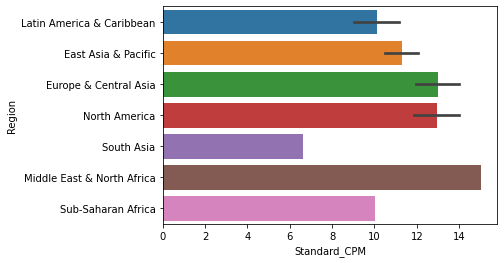

In [49]:
# Visual representing summary table aobve - standard cost per month by region 
sns.barplot(x = "Standard_CPM", y = "Region", data = netflix_gdp2, orient = "h")

In [42]:
netflix_gdp2.corr(method = "pearson")

,Total_Library_Size,TV_num,Movies_num,Basic_CPM,Standard_CPM,Premium_CPM,2020_GDP
Total_Library_Size,1.000000,0.971146,0.849957,-0.062877,-0.055200,-0.071521,0.089081
TV_num,0.971146,1.000000,0.699786,-0.003814,0.002285,-0.011100,0.069922
Movies_num,0.849957,0.699786,1.000000,-0.179913,-0.170391,-0.189711,0.114259
Basic_CPM,-0.062877,-0.003814,-0.179913,1.000000,0.898535,0.820914,0.017438
Standard_CPM,-0.055200,0.002285,-0.170391,0.898535,1.000000,0.978768,0.143382
Premium_CPM,-0.071521,-0.011100,-0.189711,0.820914,0.978768,1.000000,0.152493
2020_GDP,0.089081,0.069922,0.114259,0.017438,0.143382,0.152493,1.000000


<AxesSubplot:>

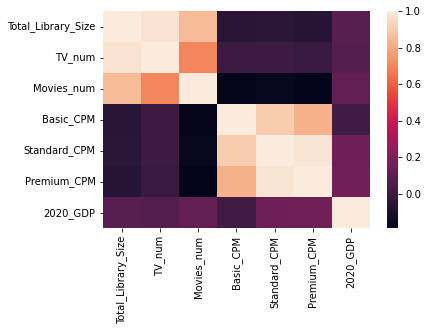

In [44]:
## Visual representation of the summary table above - see that GDP has very weak correlation between the parameters
sns.heatmap(netflix_gdp2.corr(method = "pearson"))

In [61]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 7.7 MB 480 kB/s eta 0:00:01
     |████████████████████████████████| 18.5 MB 359 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 3.2 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.


In [70]:
!pip install mapclassify

You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.


In [63]:
# generate country code  based on country name 
import pycountry 

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
netflix_gdp2['CODE']=alpha3code(netflix_gdp2.Country)
netflix_gdp2.head()

,Country_code,Country,Total_Library_Size,TV_num,Movies_num,Basic_CPM,Standard_CPM,Premium_CPM,2020_GDP,Region,IncomeGroup,CODE
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,3.892881e+11,Latin America & Caribbean,Upper middle income,ARG
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,1.327836e+12,East Asia & Pacific,High income,AUS
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,4.332585e+11,Europe & Central Asia,High income,AUT
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,5.218613e+11,Europe & Central Asia,High income,BEL
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,3.657276e+10,Latin America & Caribbean,Lower middle income,None


In [71]:
import geopandas
import mapclassify

In [65]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 

merge=pd.merge(world,netflix_gdp2,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude

location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')

merge=merge.merge(location,on='name').sort_values(by='Standard_CPM',ascending=False).reset_index()

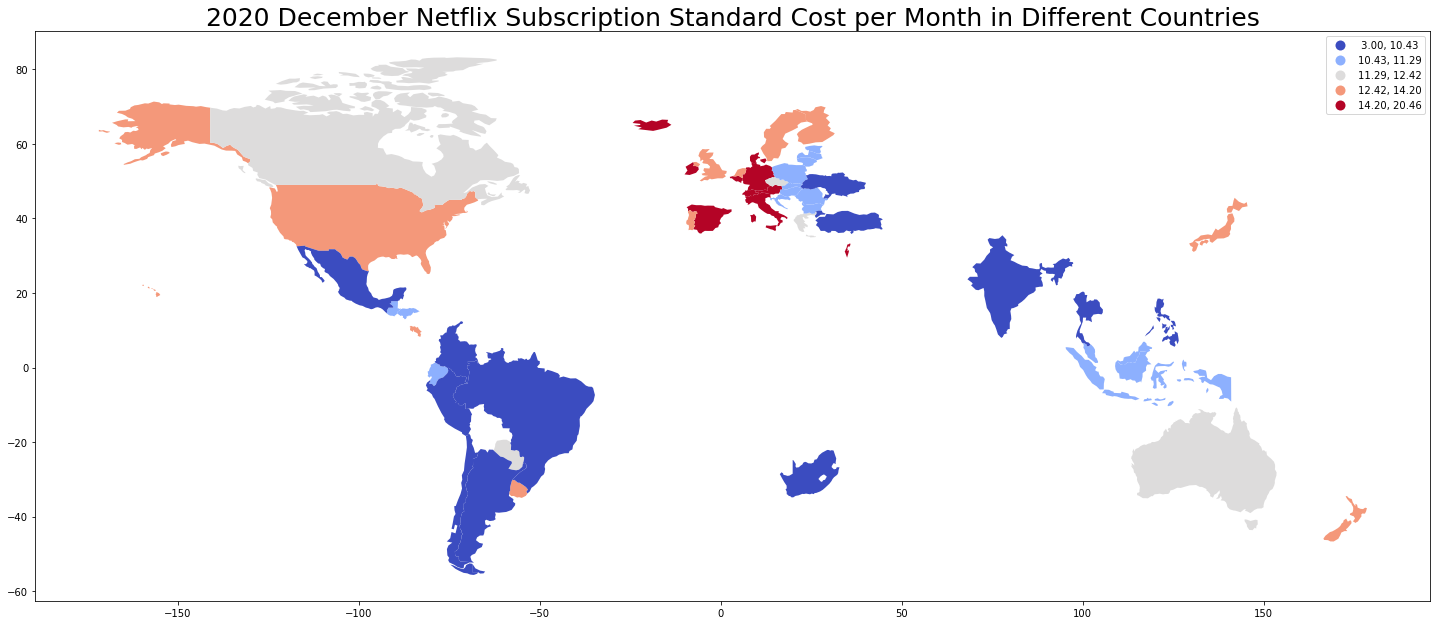

In [79]:
# plot standard cost per month on a world map 
merge.plot(column='Standard_CPM', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2020 December Netflix Subscription Standard Cost per Month in Different Countries',fontsize=25)
# add countries names and numbers 

plt.show()